[1 0 1 ..., 0 1 1]
[[ 0.03  0.97]
 [ 0.95  0.05]
 [ 0.26  0.74]
 ..., 
 [ 0.71  0.29]
 [ 0.06  0.94]
 [ 0.08  0.92]]
[[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]]
[1 0 0 ..., 0 1 1]
Normalized confusion matrix
[[ 0.83  0.17]
 [ 0.08  0.92]]


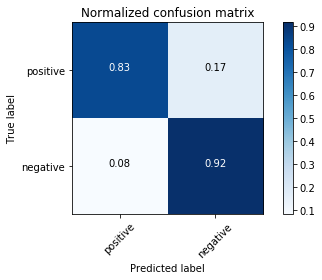

In [12]:
import os
os.environ['KERAS_BACKEND']='theano'
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import pickle

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
    
    
    
    
f1 = open('y_pred_file','rb')
y_pred = pickle.load(f1)

f2 = open('y_test_labels','rb')
y_test = pickle.load(f2)


preds = np.argmax(y_pred, axis = 1)
test = np.argmax(y_test, axis = 1)

print(preds)
print(y_pred)
print(y_test)
print(test)

class_names = ['positive','negative']

cm = confusion_matrix(test, preds) 
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


